<a href="https://colab.research.google.com/github/Rushikesh01999/Machine-Learning/blob/master/basic_cat_dog_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ImportError: ignored

In [5]:
train_path = '/content/drive/My Drive/Dataset-m/training_set'

test_path = '/content/drive/My Drive/Dataset-m/test_set'

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats-1', 'dogs-1'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats-1', 'dogs-1'], batch_size=10, shuffle=False)

Found 218 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [8]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

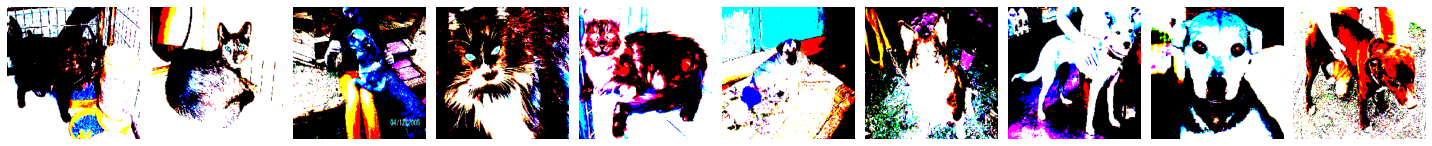

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [17]:
model=Sequential([ Conv2D(filters=32, kernel_size=(6,6),activation='relu',padding='SAME',input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None),
                  Conv2D(filters=16, kernel_size=(3,3),activation='relu',padding='SAME'),
                   MaxPool2D(pool_size=(2, 2), strides=1, padding='valid', data_format=None),
                  Flatten(),
                  Dense(2, activation='softmax')
                  ])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      3488      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 16)      4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 197136)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 394274    
Total params: 402,386
Trainable params: 402,386
Non-trainable params: 0
________________________________________________

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x=imgs, y=labels, batch_size=10, epochs=10, verbose=2, validation_split=0.1,  shuffle=True)

Epoch 1/10
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 208.8137 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 - 0s - loss: 5.4637 - accuracy: 0.6667 - val_loss: 265.7881 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 - 0s - loss: 15.2361 - accuracy: 0.4444 - val_loss: 239.2143 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 - 0s - loss: 1.0596e-07 - accuracy: 1.0000 - val_loss: 216.2148 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 196.1459 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 178.5116 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 162.9282 - val_accuracy: 0.0000e+00
Epoch 8/10
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 149.0757 - val_accuracy: 0.0000e+00
Epoch 9/10
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 136.7263 - val_accuracy: 0.0000e+00
Epoch 10/10
1/1 - 0s - loss: 0.0000e+00 - accuracy: 1

In [29]:
img,label=next(test_batches)
model.predict(img, batch_size=2, verbose=2)

5/5 - 0s


array([[2.1730274e-11, 1.0000000e+00],
       [1.0000000e+00, 2.6511012e-16],
       [0.0000000e+00, 1.0000000e+00],
       [2.8082520e-15, 1.0000000e+00],
       [1.0000000e+00, 6.2146781e-11],
       [1.0000000e+00, 1.3399316e-21],
       [9.1607881e-01, 8.3921172e-02],
       [4.5621259e-36, 1.0000000e+00],
       [1.0902086e-29, 1.0000000e+00],
       [1.1837335e-17, 1.0000000e+00]], dtype=float32)